This is without choosing/claiming cards well:

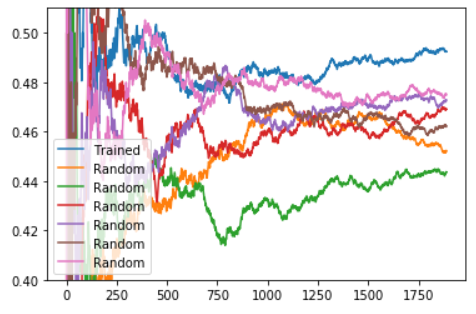

The trained neural net pulls ahead in terms of winrate.

When a second neural net is trained, holding the first one steady, you can tell that it does even better:
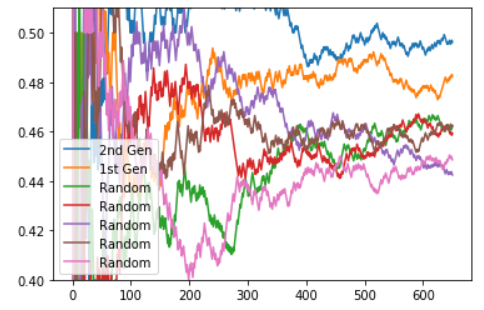

Here's how it fares after (sort of) using the qtable to also pick/claim cards:
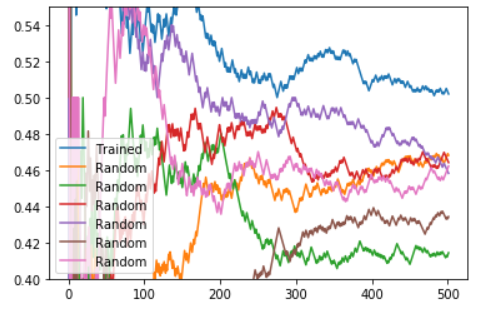

One thing I noticed is that my method for using the qtable to pick cards wasn't very effective. Because I don't know what cards the president or chancellor will claim, I just chose one of the possibilities and queried the qtable for the value if that possibility happened. However that wasn't always accurate, and so the picking cards wasn't always optimal. Since it wouldn't be optimal anyway, I just reverted back to having liberals always play liberal and fascists always play fascist cards.

Another thing I noticed was that a bigger network was not necessarily better. Originally I had a RNN with 3 hidden layers each with 200 neurons. When I decreased that to 2 hidden layers with 20 neurons, the network *improved*. With the larger network the q values all regressed to 0. It could also be my training method wasn't perfect which made it harder to learn with more hidden layers.

Eventually I implemented a simple elo system. Initially the elo dropped while it was still learning (and being punished by the other networks for its mistakes), but eventually it went up. Interestingly enough, when its elo started climbing so did the other networks elos, suggesting they were learning teamwork or a meta.

I analyzed the kill probabilities, and the differences are so small that the game is practically random.

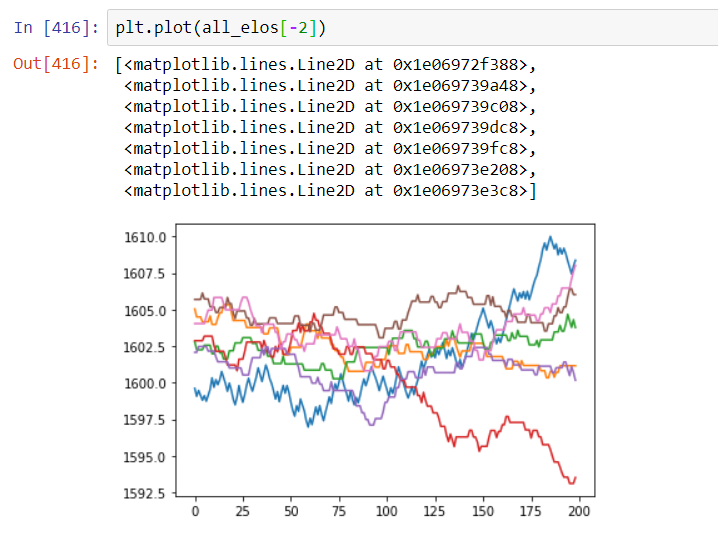

So I switched up how I computed the probabilities. I changed the q-table to have a sigmoid at the end of the last layer, so it outputted a value from 0-1. Then I changed the reward function to be 0 for a loss, 1 for a win, and 0.5 for every other move. The probabilities were, rather than a softmax, just the q-values (divided by their sum). This let the probabilities spread out a little more.

c:\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
c:\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in subtract
  # Remove the CWD from sys.path while we load stuff.
c:\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Z contains NaN values. This may result in rendering artifacts.


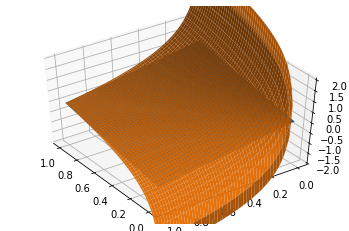

In [34]:
import numpy as np
#%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def ratio_old(x, y):
    return x-y

def ratio_new(x, y):
    return np.log(x)-np.log(y)

xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf1 = ax.plot_surface(xx, yy, ratio_old(xx, yy))
surf2 = ax.plot_surface(xx, yy, ratio_new(xx, yy))
ax.set_zlim3d(-2, 2)
ax.view_init(elev=45., azim=145)


Here are the results for the new version:
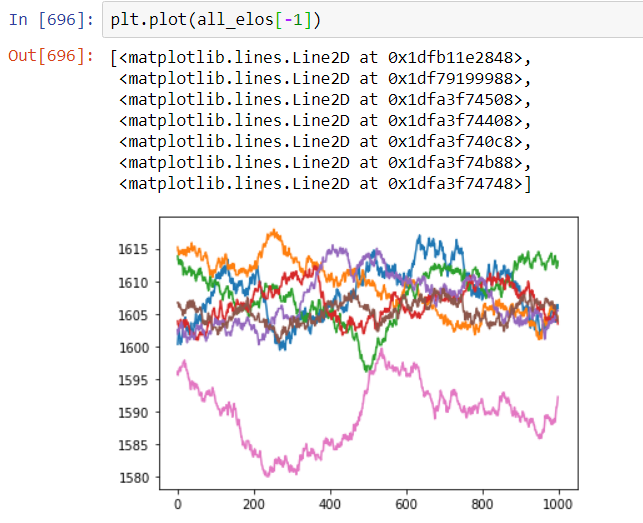

The top one is six different AI's, the bottom one is a random player. About this point I realized that the random player had a hardcoded disadvantage from the other AI's. The AI's when fascist always discarded fascist cards, while the random player chose randomly. I switched the random player to be the same as the AI's.